# Importing Data into a Pandas DataFrame

In [139]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os

In [140]:
# Files to load
city_data_to_load = os.path.join("Resources", "city_data.csv")
ride_data_to_load = os.path.join("Resources", "ride_data.csv")

In [141]:
# Read city data file and store it in a Pandas DF
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [142]:
# Read ride data file and store it in a Pandas DF
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


# Data Cleaning: City Data df


In [143]:
# Get the columns and the rows
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [144]:
# Get the columns and the rows that are not null
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [145]:
# Get the data types of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [146]:
# Find out how many unique data points there are for each type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [147]:
# Get the number of data points from the Urban cities
sum(city_data_df["type"]=="Urban")

66

In [148]:
# Get the number of data points from the Rural cities
sum(city_data_df["type"]=="Suburban")

36

In [149]:
# Get the number of data points from the Rural cities
sum(city_data_df["type"]=="Rural")

18

# Data Cleaning: Ride Data df

In [150]:
# Get the columns and the rows
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [151]:
# Get the columns and the rows that are not null
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [152]:
# Get the data types of each column
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

# Merge dfs

In [153]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


# Create BUBBLE CHART 

-av fare vs total # of rides
-bubble size- total number of drivers for each type (urb, suburb, rur)

In [154]:
# Create the Urban Cities DF, Suburban Cities DF, and Rural Cities DF
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

urban_cities_df.head()
suburban_cities_df.head()
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [155]:
# Get the number of rides for Urban Cities, Suburban Cities, and Rural Cities
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

urban_ride_count.head()
suburban_ride_count.head()
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [156]:
# Get the average fare for each city in Urban Cities, Suburban Cities, and Rural Cities
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

urban_avg_fare.head()
suburban_avg_fare.head()
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [157]:
# Get the average number of drivers for each Urban City, Suburban City, and Rural City
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

urban_driver_count.head()
suburban_driver_count.head()
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

# CREATE URBAN CITIES BUBBLE CHART

- x axis: number of rides
- y axis: av fare for each city
- marker size: av number of drivers

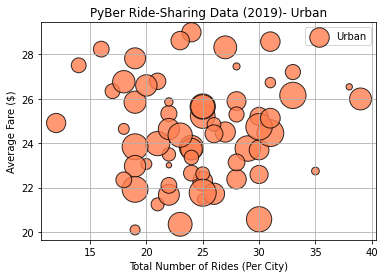

In [158]:
# Build the scatter plots for Urban Cities using the MATLAB method
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count, c="coral",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)- Urban")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Add the legend
plt.legend()

# Show the plot
plt.show()


# CREATE SUBURBAN CITIES BUBBLE CHART

- x axis: number of rides
- y axis: av fare for each city
- marker size: av number of drivers

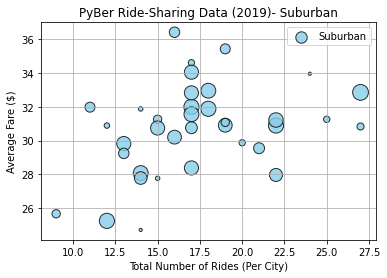

In [159]:
# Build the scatter plots for Suburban Cities using the MATLAB method
plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_driver_count, c="skyblue", 
            edgecolor="black", linewidths=1, 
            alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)- Suburban")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Add the legend
plt.legend()

# Show the plot
plt.show()

# CREATE RURAL CITIES BUBBLE CHART

- x axis: number of rides
- y axis: av fare for each city
- marker size: av number of drivers

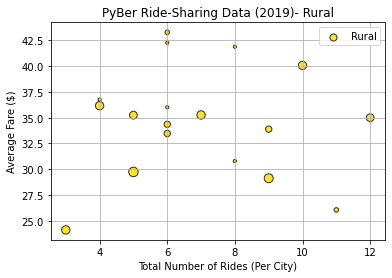

In [160]:
# Build the scatter plot for Rural Cities using the MATLAB method
plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_driver_count, c="gold", 
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)- Rural")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Add the legend
plt.legend()

# Show the plot
plt.show()

# Create Bubble Chart for av. fare Vs no. of rides w/ bubble size based on the total number of drivers for three city types.

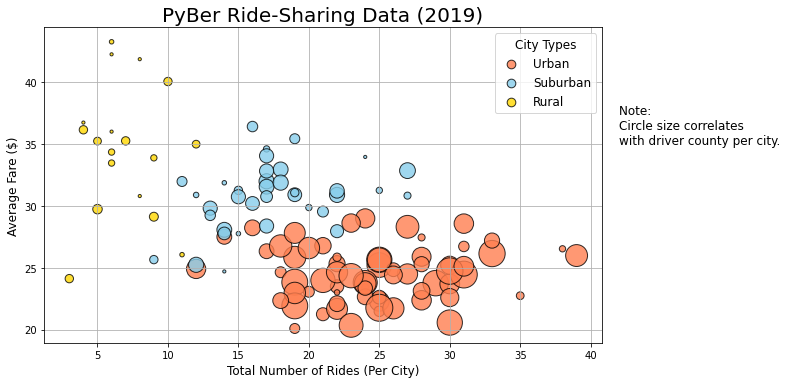

In [161]:
# Add the scatter plots for each city type
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count, c="coral",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_driver_count, c="skyblue", 
            edgecolor="black", linewidths=1, 
            alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_driver_count, c="gold", 
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Rural")

# Add graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
        scatterpoints=1, loc="best", title="City Types")

### this lets the legend bubbles be of the same size
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Add text label about circle size
plt.text(42, 35, "Note: \nCircle size correlates\nwith driver county per city.", fontsize="12")

# Save the figure
plt.savefig("Analysis/Fig1.png")
plt.gcf().subplots_adjust(bottom=0.15)

# Show the plot
plt.show()

# Summary Statistics 
- The total number of rides for each city type.
- The average fares for each city type.
- The total number of drivers for each city type.

# 1. The total number of rides for each city type.

In [162]:
# Get summary statistics for Urban Cities
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [163]:
# Get summary statitics for Suburban Cities
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [164]:
# Get summary statistics for Rural Cities
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [165]:
# Get summary statistics of the ride count for Urban Cities
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [166]:
# Get summary statistics of the ride count for Suburban Cities
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [167]:
# Get summary statistics of the ride count for Rural Cities
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

# Use Pandas mean(), median(), mode()

In [168]:
# Calculate the mean of the ride count for each city type
round(urban_ride_count.mean(), 2), round(suburban_ride_count.mean(), 2), round(rural_ride_count.mean(), 2)

(24.62, 17.36, 6.94)

In [169]:
# Calculate the median of the ride count for each city type
round(urban_ride_count.median(), 2), round(suburban_ride_count.median(), 2), round(rural_ride_count.median(), 2)

(24.0, 17.0, 6.0)

In [170]:
# Calculate the mode of the ride count for each city type
round(urban_ride_count.mode(), 2), round(suburban_ride_count.mode(), 2), round(rural_ride_count.mode(), 2)

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [171]:
round(urban_ride_count.mode(), 2)

0    22
1    25
dtype: int64

In [172]:
round(suburban_ride_count.mode(), 2)

0    17
dtype: int64

In [173]:
round(rural_ride_count.mode(), 2)

0    6
dtype: int64

# NumPy mean(),  median(), mode() fns &  SciPy mode() Function

In [174]:
# Import NumPy and the stats module from SciPy
import numpy as np
import scipy.stats as sts

In [175]:
# Calculate the measures of central tendency for the ride count for the Urban Cities
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride count for the urban trips is{mean_urban_ride_count: .2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride count for the urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride count for the urban trips is {mode_urban_ride_count}.")

The mean for the ride count for the urban trips is 24.62.
The median for the ride count for the urban trips is 24.0.
The mode for the ride count for the urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [176]:
# Calculate the measures of central tendency for the ride count for the Suburban Cities
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride count for the suburban trips is{mean_suburban_ride_count: .2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride count for the suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride count for the suburban trips is {mode_suburban_ride_count}.")


The mean for the ride count for the suburban trips is 17.36.
The median for the ride count for the suburban trips is 17.0.
The mode for the ride count for the suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [177]:
# Calculate the measures of central tendency for the ride count for the Rural Cities
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride count for the rural trips is{mean_rural_ride_count: .2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride count for the rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride count for the rural trips is {mode_rural_ride_count}.")

The mean for the ride count for the rural trips is 6.94.
The median for the ride count for the rural trips is 6.0.
The mode for the ride count for the rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


# 2. Summary Statistics for the Fare by City Type

To get the summary statistics for the average fare for each city type, we need to create a Series for each city type based on the "fare" column in each city type df

In [178]:
# Get the fare for the Urban Cities
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [179]:
# Calculate the measures of central tendency for the average fare for the Urban Cities
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares: .2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares: .2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $ 24.53.
The median fare price for urban trips is $ 24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [180]:
# Get the fare for the Suburban Cities
suburban_fares = suburban_cities_df["fare"]
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [181]:
# Calculate the measures of central tendency for the average fare for the Suburban Cities
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares: .2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares: .2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $ 30.97.
The median fare price for suburban trips is $ 30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [182]:
# Get the fare for the Rural Cities
rural_fares = rural_cities_df["fare"]
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [183]:
# Calculate the measures of central tendency for the average fare for the Rural Cities
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares: .2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares: .2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $ 34.62.
The median fare price for rural trips is $ 37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


# Summary Statistics for the Number of Drivers by City Type

To get the summary statistics for the number of drivers by city type, we need to create a Series for each city type based on the "driver_count" column in each city type DataFrame.

In [184]:
# Get the driver counts for Urban Cities
urban_drivers = urban_cities_df["driver_count"]
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [185]:
# Calculate the measures of central tendency for the driver counts for Urban Cities
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean number of drivers in urban cities is {mean_urban_drivers: .0f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median number of drivers in urban cities is {median_urban_drivers: .0f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode drivers in urban cities is {mode_urban_drivers}.")

The mean number of drivers in urban cities is  37.
The median number of drivers in urban cities is  37.
The mode drivers in urban cities is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [186]:
# Get the driver counts for Suburban Cities
suburban_drivers = suburban_cities_df["driver_count"]
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [187]:
# Calculate the measures of central tendency for the driver counts for Suburban Cities
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean number of drivers in suburban cities is {mean_suburban_drivers: .0f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median number of drivers in suburban cities is {median_suburban_drivers: .0f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode drivers in suburban cities is {mode_suburban_drivers}.")

The mean number of drivers in suburban cities is  14.
The median number of drivers in suburban cities is  16.
The mode drivers in suburban cities is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [188]:
# Get the driver counts for Rural Cities
rural_drivers = rural_cities_df["driver_count"]
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [189]:
# Calculate the measures of central tendency for the driver counts for Rural Cities
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean number of drivers in suburban cities is {mean_rural_drivers: .0f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median number of drivers in suburban cities is {median_rural_drivers: .0f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode drivers in suburban cities is {mode_rural_drivers}.")


The mean number of drivers in suburban cities is  4.
The median number of drivers in suburban cities is  4.
The mode drivers in suburban cities is ModeResult(mode=array([1], dtype=int64), count=array([32])).


# Box and Whisker plot to visualize

- No. of rides for each city type
- Fares for each city type
- No. of drivers for each city

# Box-and-Whisker Plots for Ride Count Data

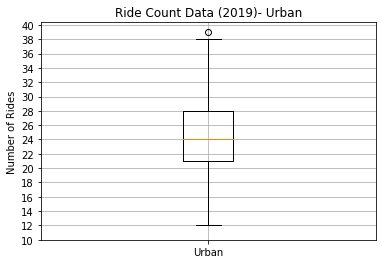

In [190]:
# Create a box-and-whisker plot for Urban Cities ride count
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

# Add title, y-axis label, and grid
ax.set_title("Ride Count Data (2019)- Urban")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()

plt.show()

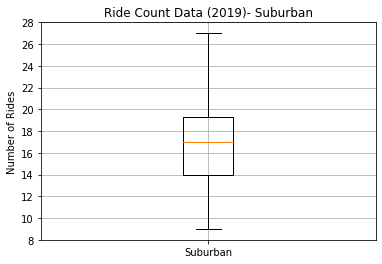

In [191]:
# Create a box-and-whisker plot for Suburban Cities ride count
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)

# Add title, y-axis label, and grid
ax.set_title("Ride Count Data (2019)- Suburban")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(8, 30, step=2.0))
ax.grid()

plt.show()

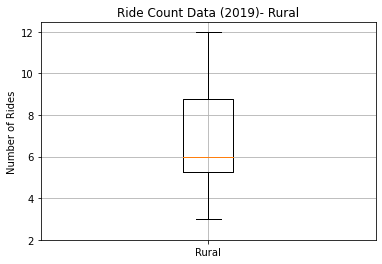

In [192]:
# Create a box-and-whisker plot for Rural Cities ride count
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)

# Add title, y-axis label, and grid
ax.set_title("Ride Count Data (2019)- Rural")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(2, 14, step=2.0))
ax.grid()

plt.show()


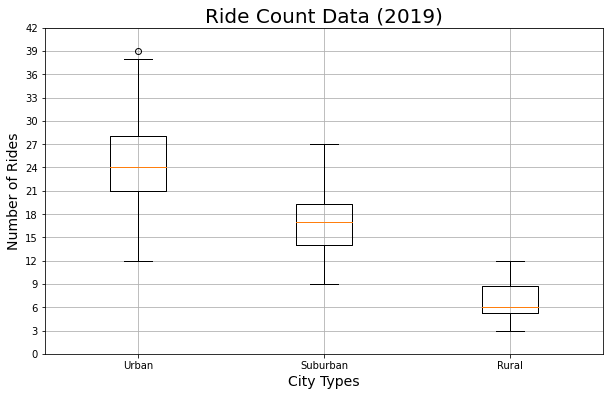

In [193]:
# Add all the ride count box-and-whisker plots to the same graph
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]

fig, ax = plt.subplots(figsize=(10,6))

ax.set_title("Ride Count Data (2019)", fontsize=20)
ax.set_ylabel("Number of Rides", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

# Save the figure
plt.savefig("Analysis/Fig2.png")
plt.show()

In [194]:
# Get the city that matches outlier (39)
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


# Box-and-Whisker Plots for Ride Fare Data

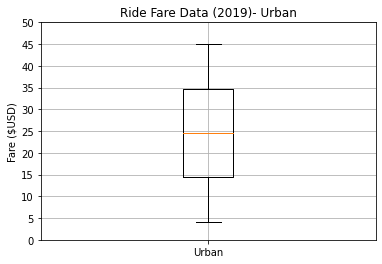

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [195]:
#Create a box-and-whisker plot for the Urban Fare data
x_label = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_label)

# Add the title, y-axis, and grid
ax.set_title("Ride Fare Data (2019)- Urban")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0, 55, step=5.0))
ax.grid()

plt.show()
print("Summary Statistics")
urban_fares.describe()

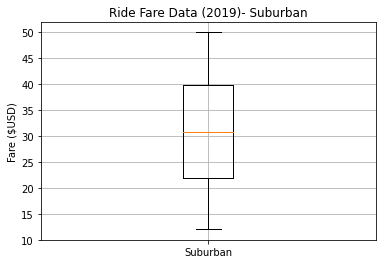

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [196]:
# Create a box-and-whisker plot for the Suburban Fare data
x_label = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_label)

# Add title, y-axis label, and grid
ax.set_title("Ride Fare Data (2019)- Suburban")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(10, 55, step=5.0))
ax.grid()

plt.show()
print("Summary Statistics")
suburban_fares.describe()

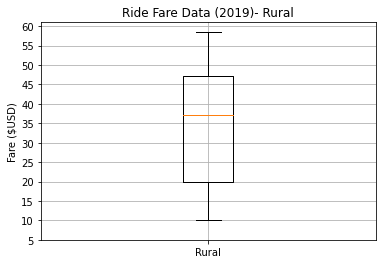

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [197]:
# Create a box-and-whisker plot for the Rural Fare Data
x_label = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_label)

# Add title, y-axis label, and grind
ax.set_title("Ride Fare Data (2019)- Rural")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(5, 65, step=5.0))
ax.grid()

plt.show()
print("Summary Statistics")
rural_fares.describe()

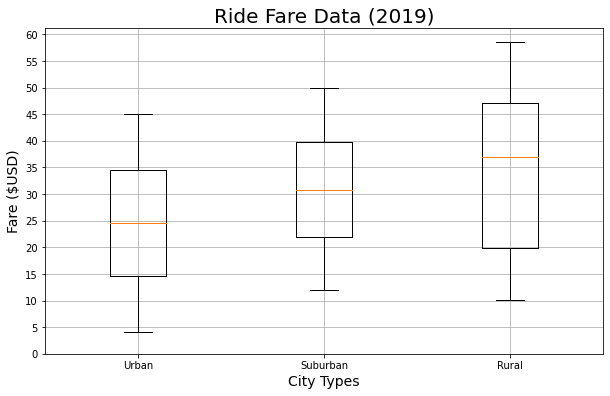

In [198]:
# Create a box-and-whisker plot that has all three city types' fare data
x_labels = ["Urban", "Suburban", "Rural"]
fare_data = [urban_fares, suburban_fares, rural_fares]

fig, ax = plt.subplots(figsize=(10,6))

ax.set_title("Ride Fare Data (2019)", fontsize=20)
ax.set_ylabel("Fare ($USD)", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 65, step=5.0))
ax.grid()

# Save figure
plt.savefig("Analysis/Fig3.png")
plt.show()

# Box-and-Whisker Plots for Driver Count Data

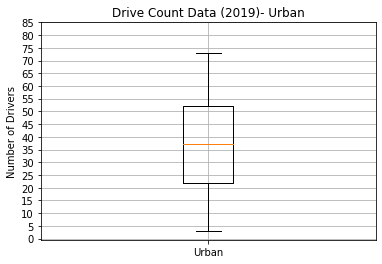

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [199]:
# Create a box-and-whisker plot for the urban driver count data
x_label = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels=x_label)

# Add title, y-axis label, and grid
ax.set_title("Drive Count Data (2019)- Urban")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()

plt.show()
print("Summary Statistics")
urban_drivers.describe()

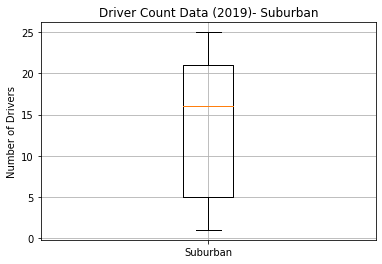

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [200]:
# Create a box-and-whiskers plot for the suburban driver count data
x_label = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers, labels=x_label)

# Add title, y-axis label, and grid
ax.set_title("Driver Count Data (2019)- Suburban")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 30, step=5.0))
ax.grid()

plt.show()
print("Summary Statistics")
suburban_drivers.describe()

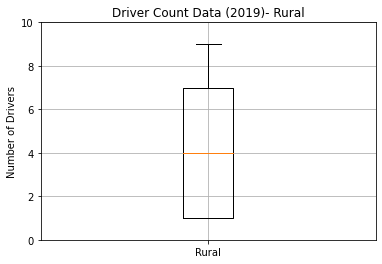

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [201]:
# Create a box-and-whiskers plot for the rural driver count data
x_label = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers, labels=x_label)

# Add title, y-axis label, and grid
ax.set_title("Driver Count Data (2019)- Rural")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 12, step=2.0))
ax.grid()

plt.show()
print("Summary Statistics")
rural_drivers.describe()

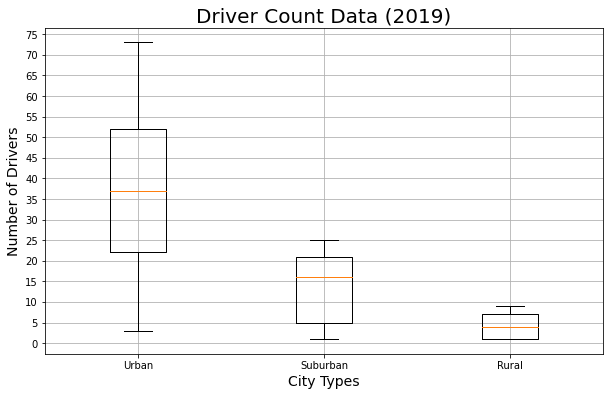

In [202]:
# Create a box-and-whiskers plot for the driver count data in all three city types
x_label = ["Urban", "Suburban", "Rural"]
driver_data = [urban_drivers, suburban_drivers, rural_drivers]

fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(driver_data, labels=x_label)

ax.set_title("Driver Count Data (2019)", fontsize=20)
ax.set_ylabel("Number of Drivers", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.set_yticks(np.arange(0, 80, step=5.0))
ax.grid()

# Save figure
plt.savefig("Analysis/Fig4.png")
plt.show()

# Create a Pie Chart:

- The percent of total fares.
- The percent of total rides.
- The percent of total drivers.

# Get the percentages of Fares for each City Type:

- Get the total fares for each city type.
- Get the total for all the fares for all the city types.
- Calculate the percentage of the total fares for each city type.

In [203]:
# Get the sum of the fares for each city type
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [204]:
# Get the sum of all the fares
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [205]:
# Calculate the percentage of fare for each city type
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

A more adept way of finding the percent is:
type_percents= 100 *(pyber_data_df.groupby(["type"]).sum()["fare"]/pyber_data_df["fare"].sum())

In [206]:
type_percents= 100 *(pyber_data_df.groupby(["type"]).sum()["fare"]/pyber_data_df["fare"].sum())
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

# CREATE PIE CHART

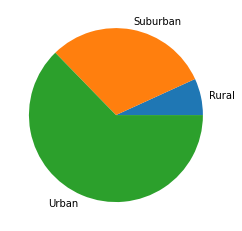

In [207]:
# Build the percentage of fares pie chart
plt.pie(type_percents, labels = ["Rural", "Suburban", "Urban"])
plt.show()

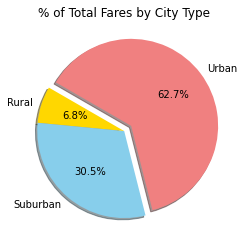

In [208]:
# Adjustments:
plt.pie(type_percents,
       labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "skyblue", "lightcoral"],
       explode=[0, 0, 0.1],
       autopct='%1.1f%%',
       shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

plt.show()

## NOTE:

There is no parameter for fontsize in pie charts like there is for scatter plots. Matplotlib has a way to change the default parameters for charts by using the rcParams, which accesses the run and configure settings for the Matplotlib parameters.

To change the default paraments, we need to import the matplotlib library, which is not the same as the matplotplib.pyplot we imported for graphing with the plt() function.

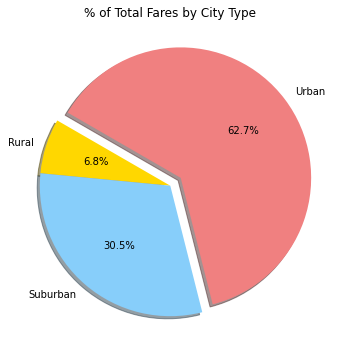

In [209]:
# Import mpl to change the plot configurations using rcParams
import matplotlib as mpl

# Build pie chart
plt.subplots(figsize=(10,6))
plt.pie(type_percents,
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Change the default font size from 10 to 14
mpl.rcParams['font.size'] = 14

# Save figure
plt.savefig("Analysis/Fig5.png")

# Show figure
plt.show()

# Get the percentages of Total Rides for each City Type

- Get the total number of rides for each city type.
- Get the total rides for all the city types.
- Calculate the percentage of the total rides for each city type.

In [211]:
# Calculate the percentage of rides for each city type
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

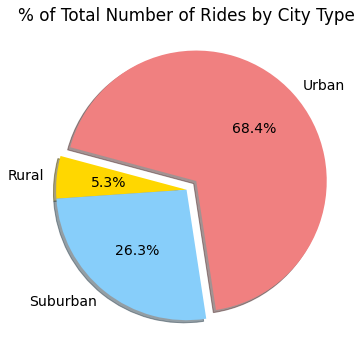

In [213]:
# Build the percentage of rides pie chart
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents, 
       labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0, 0, 0.1],
       autopct='%1.1f%%',
       shadow=True, startangle=165)

plt.title("% of Total Number of Rides by City Type")

# Change the default front size from 10 to 14
mpl.rcParams['font.size'] = 14

# Save image
plt.savefig("Analysis/Fig6.png")

# Show figure
plt.show()

# Get the percentages of Total Drivers for each city type

- Get the total number of drivers for each city type.
- Get the total drivers for all the city types.
- Calculate the percentage of the total drivers for each city type.

In [214]:
# Calculate the percentage of drivers for each city type
driver_percents = 100 * city_data_df.groupby(["type"]).sum()["driver_count"] / city_data_df["driver_count"].sum()
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

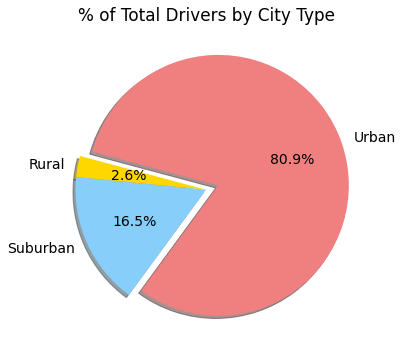

In [215]:
# Build the percentage of drivers pie chart
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
       labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0, 0, 0.1],
       autopct='%1.1f%%',
       shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")

# Change the default size from 10 to 14
mpl.rcParams['font.size'] = 14

# Save figure
plt.savefig("Analysis/Fig7.png")

# Show figure
plt.show()
